In [99]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

In [100]:
fig, ax = plt.subplots()   #Create empty figure and axis for plotting
plt.close(fig)  #Keeps notebook from displaying the empty figure upon creation

#Set the x and y axis ranges
ax.set_xlim(( 0, 2))
ax.set_ylim((-3, 3))

#This basically creates an empty "line object" that we'll fill with (x,y) values in the animate() function
E1, = ax.plot([], [], lw=2, label='E1')
E2, = ax.plot([],[],lw=2)
superposition, = ax.plot([],[],lw=2)
PDF, = ax.plot([],[], lw = 2)

In [101]:
def init():

    # make a line object called E1 and label it E1
    E1.set_data([], [])
    E1.set_label('E1')

    # make a line object called E2 and label it E2
    E2.set_data([], [])
    E2.set_label('E2')
    
    # make a line object called superpositoin and
    superposition.set_data([], [])
    superposition.set_label('Superposition')

    # set up PDF line and label it
    PDF.set_data([], [])
    PDF.set_label('PDF')

    return (E1, E2, superposition, PDF)

In [102]:
def animate(i):
    x = np.linspace(0, 2, 1000)

    # psi1 is normalized naturally

    psi1 = np.sin((np.pi*x)/2)*np.cos(i/16)

    # psi2 is normalized naturally
    # psi2_real = np.sin(np.pi*x)
    psi2 = np.sin(np.pi*x)*np.cos(i/4)

    # normalization for psi 2
    # psi2 = psi2 / np.linalg.norm(psi2)
    
    # Psi_real = psi1_real + psi2_real
    # normalization for Psi
    Psi = (psi1 + psi2)/np.sqrt(2)
    
    # Psi = Psi / np.linalg.norm(Psi)

    Psi_squared = (np.sin((np.pi*x)/2))**2+(np.sin(np.pi*x))**2+(np.sin((np.pi*x)/2))*(np.sin(np.pi*x))*np.cos((3/16)*i)
    Psi_squared = Psi_squared/2
    # Psi_squared = Psi_squared / np.linalg.norm(Psi_squared)

    E1.set_data(x, psi1)
    E1.set_label('E1')
    E2.set_data(x, psi2)
    E2.set_label('E2')
    superposition.set_data(x, Psi)
    superposition.set_label('Superposition')
    PDF.set_data(x, Psi_squared)
    PDF.set_label('PDF')
    plt.legend([E1, E2, superposition, PDF], ['Psi1', 'Psi2', 'Superposition', 'PDF of superposition'])

    return (E1, E2, superposition, PDF)


In [103]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)


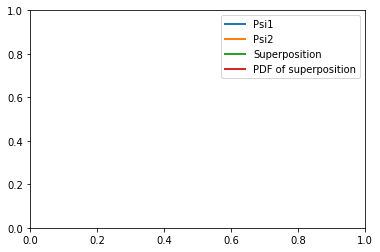

In [104]:
HTML(anim.to_jshtml())
# plt.show()

In [146]:
# the purpose of the following code is to illustrate the psi under different energy level
m = 9.10938356e-31
# we start with the psi in infintie square well

# input the variables
# you can change the energy level "n" here
n = 1
a = 2
# def infinite_square_well_eigans(n, a, m)
# namely the Eiganstates
# define some constants




hb = 6.62607004e-34/2/np.pi
def psi(x, n, a):

    global hb
    global m
    # wave function
    psi = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    # energy level
    E = n**2*np.pi**2*hb**2/2/m/a**2

    return psi, E


# now set up the objects
fig, ax = plt.subplots()   #Create empty figure and axis for plotting
plt.close(fig)  #Keeps notebook from displaying the empty figure upon creation

#Set the x and y axis ranges
ax.set_xlim((0, a))
ax.set_ylim((-3, 3))

# This basically creates an empty "line object" that we'll fill with (x,y) values in the animate() function
Psi_realaxis, = ax.plot([],[],lw=2)
Psi_imagaxis, = ax.plot([],[],lw=2)
PDFaxis, = ax.plot([],[], lw = 2)


# initialize again
def init():

    # make a line object called E1 and label it E1
    Psi_realaxis.set_data([], [])
    Psi_imagaxis.set_data([], [])

    PDFaxis.set_data([], [])

    return (Psi_realaxis, Psi_imagaxis, PDFaxis)



# define the animation function for eiganstates
def animate(t):
    # input the global variable into local function
    global a
    global n

    # set up the x axis


    x = np.linspace(0, a, 1000)

    time_scale = 5e2
    # psi1 is normalized naturally
    Psi, E = psi(x, n, a)
    # Psi_time = Psi*np.exp(t*E*1j/hb*time_scale)

    # Psi_time now is an time dependet imaginary function

    # now extract and plot the real and imaginary part of Psi
    # Psi_real = Psi*np.cos(E/hb*i)

    Psi_real = Psi*np.cos(t*E/hb*time_scale)
    # Psi_real = np.sin(np.pi*x)*np.cos(i/4)
    Psi_imag = Psi*np.sin(-t*E/hb*time_scale)
    PDF = Psi_real**2 + Psi_imag**2

    Psi_realaxis.set_data(x, Psi_real)

    Psi_imagaxis.set_data(x, Psi_imag)

    PDFaxis.set_data(x, PDF)

    # plt.legend([Psi_realaxis, Psi_imagaxis, PDFaxis], ['real part wave function', 'imaginary part wave function', 'PDF'])

    return (Psi_realaxis, Psi_imagaxis, PDFaxis)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                           frames=100, interval=20)

# E = n**2*np.pi**2*hb**2/2/m/a**2
# print(E/hb)
HTML(anim.to_jshtml())
# plt.show()


0.9999999999999999


In [143]:
# the purpose of the following code is to illustrate the psi under different energy level
m = 9.10938356e-31
# we start with the psi in infintie square well

# input the variables
n = 2
a = 2
# def infinite_square_well_eigans(n, a, m)
# namely the Eiganstates
# define some constants



for n in range(1, 2):

    def psi(x, n, a):

        # global hb
        # global m
        # wave function
        psi = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
        # energy level
        E = n**2*np.pi**2*hb**2/2/m/a**2

        return psi, E




    # initialize again
    def init():

        # make a line object called E1 and label it E1
        Psi_realaxis.set_data([], [])
        Psi_imagaxis.set_data([], [])

        PDFaxis.set_data([], [])

        return (Psi_realaxis, Psi_imagaxis, PDFaxis)



    # define the animation function for eiganstates
    def animate(t):
        # input the global variable into local function
        # global a
        # global n

        # set up the x axis


        x = np.linspace(0, a, 1000)

        time_scale = 2e2
        # psi1 is normalized naturally
        Psi, E = psi(x, n, a)
        # Psi_time = Psi*np.exp(t*E*1j/hb*time_scale)

        # Psi_time now is an time dependet imaginary function

        # now extract and plot the real and imaginary part of Psi
        # Psi_real = Psi*np.cos(E/hb*i)

        Psi_real = Psi*np.cos(t*E/hb*time_scale)
        # Psi_real = np.sin(np.pi*x)*np.cos(i/4)
        Psi_imag = Psi*np.sin(-t*E/hb*time_scale)
        PDF = Psi_real**2 + Psi_imag**2

        Psi_realaxis.set_data(x, Psi_real)

        Psi_imagaxis.set_data(x, Psi_imag)

        PDFaxis.set_data(x, PDF)

        # plt.legend([Psi_realaxis, Psi_imagaxis, PDFaxis], ['real part wave function', 'imaginary part wave function', 'PDF'])

        return (Psi_realaxis, Psi_imagaxis, PDFaxis)



    # now set up the objects
    fig, ax = plt.subplots()   #Create empty figure and axis for plotting
    plt.close(fig)  #Keeps notebook from displaying the empty figure upon creation

    #Set the x and y axis ranges
    ax.set_xlim((0, a))
    ax.set_ylim((-3, 3))

    # This basically creates an empty "line object" that we'll fill with (x,y) values in the animate() function
    Psi_realaxis, = ax.plot([],[],lw=2)
    Psi_imagaxis, = ax.plot([],[],lw=2)
    PDFaxis, = ax.plot([],[], lw = 2)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20)

    # E = n**2*np.pi**2*hb**2/2/m/a**2
    # print(E/hb)
    HTML(anim.to_jshtml())
    # plt.show()
